# Scikit Learning

### Bibliotecas que se usarán
- NumPy
- matplotlib
- Pandas
- Seaborn
- scikit learn

## Clasificadores

In [1]:
# !pip install scikit-learn

In [2]:
# importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# importar el separador de muestras para entrenamiento y pruebas
from sklearn.model_selection import train_test_split

In [3]:
# Cargar el dataSet
data = sns.load_dataset('iris')
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Resumen de datos estadisticos
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Distribucion de cada clase
data.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [6]:
# Separación de datos en Entrenamiento y Prueba
train, test = train_test_split(data, test_size = 0.4, stratify = data['species'], random_state = 42)
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
130,7.4,2.8,6.1,1.9,virginica
6,4.6,3.4,1.4,0.3,setosa
94,5.6,2.7,4.2,1.3,versicolor
96,5.7,2.9,4.2,1.3,versicolor
26,5.0,3.4,1.6,0.4,setosa


## Análisis exploratorio de datos

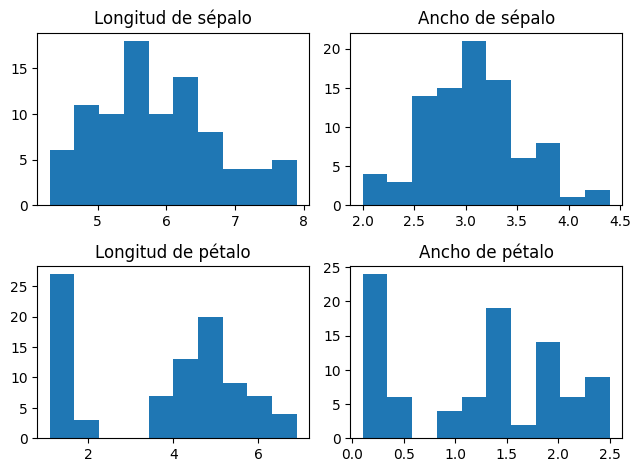

In [7]:
# Algunos histogramas para observar la distridución de los 4 atributos
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(train['sepal_length'], bins = n_bins)
axs[0, 0].set_title('Longitud de sépalo')
axs[0, 1].hist(train['sepal_width'], bins = n_bins)
axs[0, 1].set_title('Ancho de sépalo')
axs[1, 0].hist(train['petal_length'], bins = n_bins)
axs[1, 0].set_title('Longitud de pétalo')
axs[1, 1].hist(train['petal_width'], bins = n_bins)
axs[1, 1].set_title('Ancho de pétalo')
fig.tight_layout(pad=1.0);

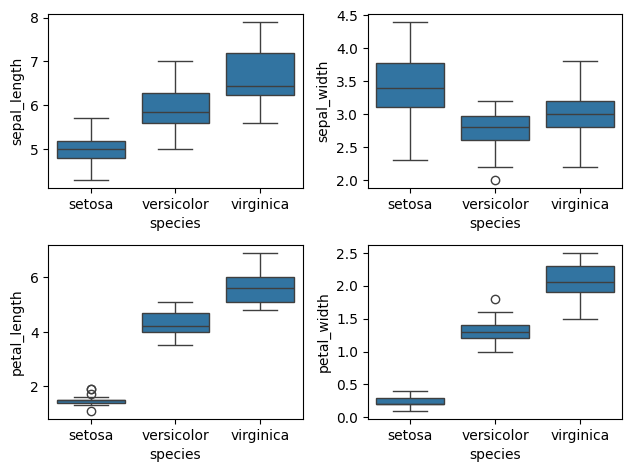

In [8]:
# Diagramas Box-plot
fig1, axs1 = plt.subplots(2, 2)
fn = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
cn = ['setosa', 'versicolor', 'virginica']
sns.boxplot(x = 'species', y = 'sepal_length', data = train, order = cn, ax = axs1[0, 0])
sns.boxplot(x = 'species', y = 'sepal_width', data = train, order = cn, ax = axs1[0, 1])
sns.boxplot(x = 'species', y = 'petal_length', data = train, order = cn, ax = axs1[1, 0])
sns.boxplot(x = 'species', y = 'petal_width', data = train, order = cn, ax = axs1[1, 1])
fig1.tight_layout(pad=1.0);

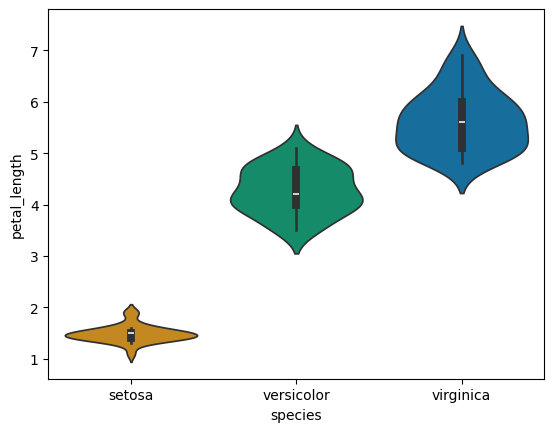

In [9]:
# Diagrama de violín
sns.violinplot(x = 'species', y = 'petal_length', data = train, order = cn, hue = 'species', palette = 'colorblind');

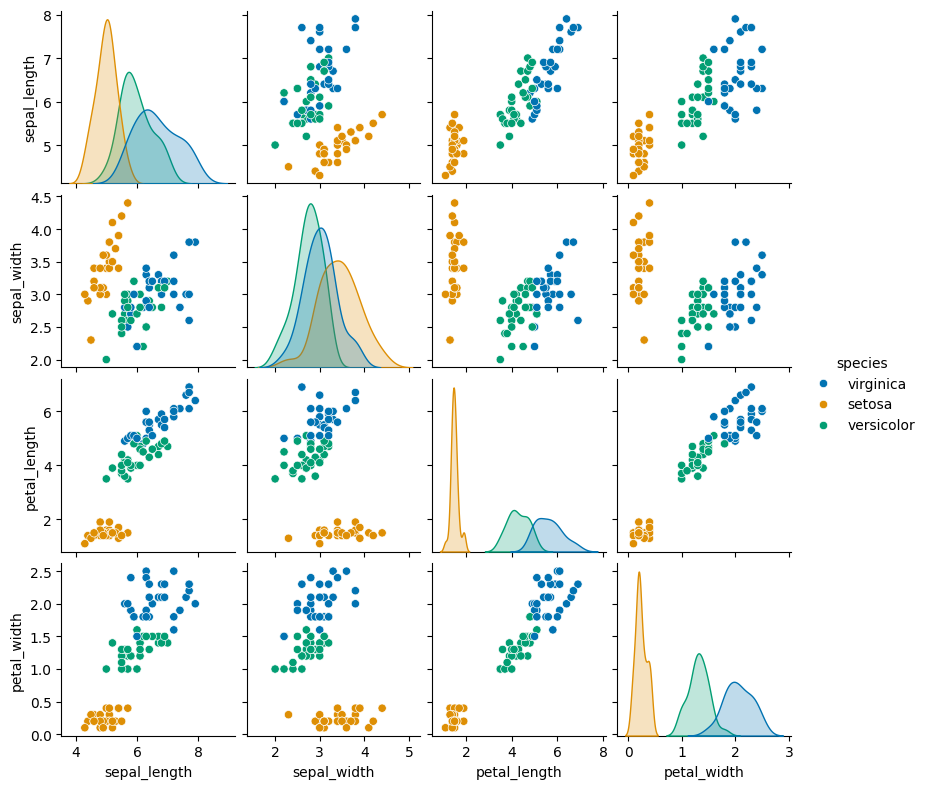

In [10]:
# Diagramas de dispersion de los atributos emparejados
sns.pairplot(train, hue='species', height=2, palette='colorblind');

In [13]:
# Matriz de correlacion
corrmat = train.corr(numeric_only=True)
corrmat

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.066927,0.880222,0.820610
sepal_width,-0.066927,1.000000,-0.369708,-0.324162
petal_length,0.880222,-0.369708,1.000000,0.967165
petal_width,0.820610,-0.324162,0.967165,1.000000


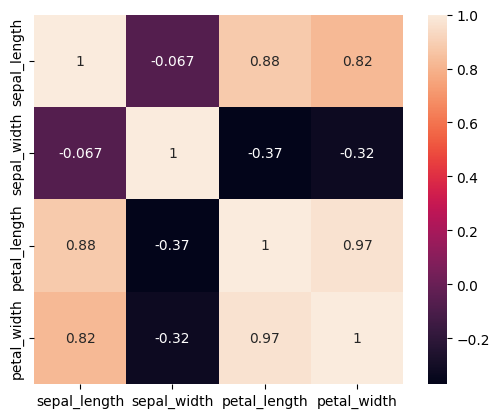

In [14]:
# Mapa de calor
sns.heatmap(corrmat, annot=True, square=True);

In [15]:
# Coordenadas paralelas
from pandas.plotting import parallel_coordinates

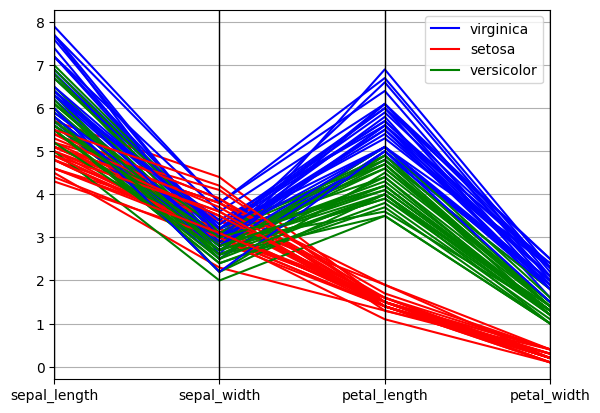

In [16]:
parallel_coordinates(train, 'species', color=['blue', 'red', 'green']);